In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


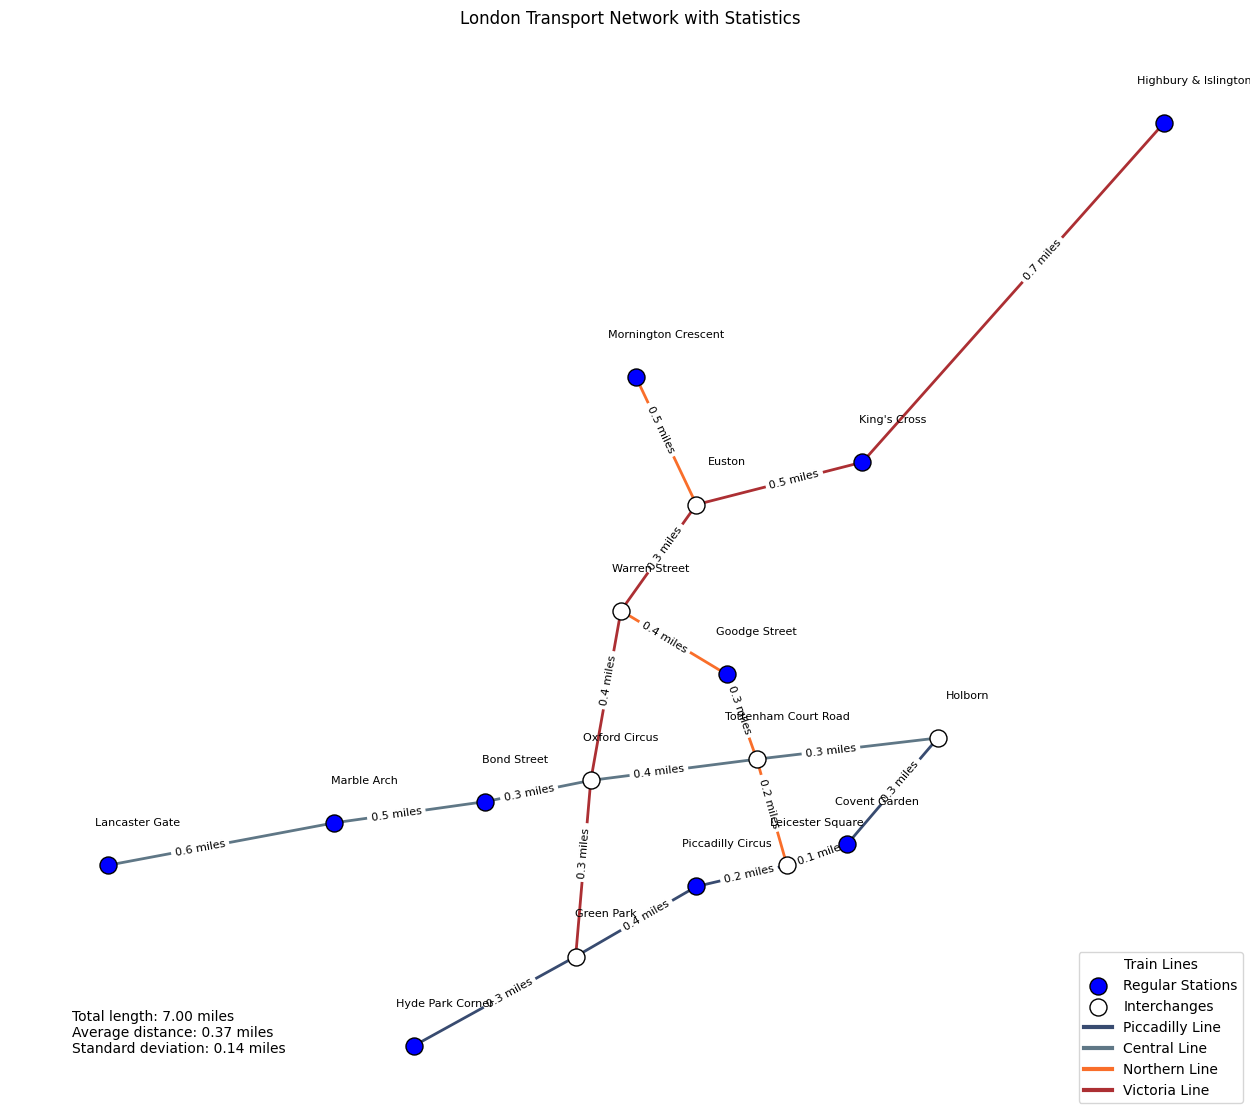

In [4]:
# Create the graph
MyGraph = nx.Graph()

# Piccadilly Line
MyGraph.add_edge("Hyde Park Corner", "Green Park", weight=0.3, line="Piccadilly")
MyGraph.add_edge("Green Park", "Piccadilly Circus", weight=0.4, line="Piccadilly")
MyGraph.add_edge("Piccadilly Circus", "Leicester Square", weight=0.2, line="Piccadilly")
MyGraph.add_edge("Leicester Square", "Covent Garden", weight=0.1, line="Piccadilly")
MyGraph.add_edge("Covent Garden", "Holborn", weight=0.3, line="Piccadilly")

# Central Line
MyGraph.add_edge("Holborn", "Tottenham Court Road", weight=0.3, line="Central")
MyGraph.add_edge("Tottenham Court Road", "Oxford Circus", weight=0.4, line="Central")
MyGraph.add_edge("Oxford Circus", "Bond Street", weight=0.3, line="Central")
MyGraph.add_edge("Bond Street", "Marble Arch", weight=0.5, line="Central")
MyGraph.add_edge("Marble Arch", "Lancaster Gate", weight=0.6, line="Central")

# Northern Line
MyGraph.add_edge("Leicester Square", "Tottenham Court Road", weight=0.2, line="Northern")
MyGraph.add_edge("Tottenham Court Road", "Goodge Street", weight=0.3, line="Northern")
MyGraph.add_edge("Goodge Street", "Warren Street", weight=0.4, line="Northern")
MyGraph.add_edge("Warren Street", "Euston", weight=0.3, line="Northern")
MyGraph.add_edge("Euston", "Mornington Crescent", weight=0.5, line="Northern")

# Victoria Line
MyGraph.add_edge("Green Park", "Oxford Circus", weight=0.3, line="Victoria")
MyGraph.add_edge("Oxford Circus", "Warren Street", weight=0.4, line="Victoria")
MyGraph.add_edge("Warren Street", "Euston", weight=0.3, line="Victoria")
MyGraph.add_edge("Euston", "King's Cross", weight=0.5, line="Victoria")
MyGraph.add_edge("King's Cross", "Highbury & Islington", weight=0.7, line="Victoria")

# Node positions using longitude, latitude
pos = {
    "Hyde Park Corner": (-0.1527, 51.5025),
    "Green Park": (-0.142, 51.5067),
    "Piccadilly Circus": (-0.134, 51.510),
    "Leicester Square": (-0.128, 51.511),
    "Covent Garden": (-0.124, 51.512),
    "Holborn": (-0.118, 51.517),
    "Tottenham Court Road": (-0.130, 51.516),
    "Oxford Circus": (-0.141, 51.515),
    "Bond Street": (-0.148, 51.514),
    "Marble Arch": (-0.158, 51.513),
    "Lancaster Gate": (-0.173, 51.511),
    "Goodge Street": (-0.132, 51.520),
    "Warren Street": (-0.139, 51.523),
    "Euston": (-0.134, 51.528),
    "Mornington Crescent": (-0.138, 51.534),
    "King's Cross": (-0.123, 51.530),
    "Highbury & Islington": (-0.103, 51.546),
}

# Line colors
colors = {
    "Piccadilly": '#384B70',  # Navy
    "Central": '#5F7786',     # Grayish Blue
    "Northern": '#F96E2A',    # Orange
    "Victoria": '#AC2F33'     # Red
}

# interchanges
interchanges = ["Green Park","Leicester Square","Holborn","Tottenham Court Road", "Oxford Circus", "Warren Street", "Euston"]

# Adjust offsets for station names
station_name_offset = 0.002
station_label_positions = {node: (x + station_name_offset, y + station_name_offset) for node, (x, y) in pos.items()}

# Calculate statistics
distances = [d["weight"] for _, _, d in MyGraph.edges(data=True)]
total_length = sum(distances) #Total Distances
average_distance = np.mean(distances) #Average Distances
std_deviation = np.std(distances) #Standard deviation

# Draw the graph
plt.figure(figsize=(16, 14))

# Draw edges with line colors
for line, color in colors.items():
    edges = [(u, v) for u, v, d in MyGraph.edges(data=True) if d["line"] == line]
    nx.draw_networkx_edges(MyGraph, pos, edgelist=edges, width=2, edge_color=color)

# Draw regular stations
regular_stations = [node for node in MyGraph.nodes if node not in interchanges]
nx.draw_networkx_nodes(MyGraph, pos, nodelist=regular_stations, node_color='blue', node_size=150, edgecolors='black', label="Regular Stations")

# Draw interchanges
nx.draw_networkx_nodes(MyGraph, pos, nodelist=interchanges, node_color='white', node_size=150, edgecolors='black', label="Interchanges")

# Add station names
nx.draw_networkx_labels(MyGraph, station_label_positions, labels={node: node for node in MyGraph.nodes()}, font_size=8, font_color="black")

# Add edge labels
edge_labels = {(u, v): f"{d['weight']} miles" for u, v, d in MyGraph.edges(data=True)}
nx.draw_networkx_edge_labels(MyGraph, pos, edge_labels=edge_labels, font_size=8, label_pos=0.6)

# Add statistics into the plot
statistics_text = (
    f"Total length: {total_length:.2f} miles\n"
    f"Average distance: {average_distance:.2f} miles\n"
    f"Standard deviation: {std_deviation:.2f} miles"
)

# Display statistics on the plot
plt.text(
    0.05, 0.05, statistics_text,
    fontsize=10,
    transform=plt.gca().transAxes,
    verticalalignment='bottom',
    horizontalalignment='left'
)
# Add  legend
for line, color in colors.items():
    plt.plot([], [], color=color, label=f"{line} Line", linewidth=3)
plt.legend(title="Train Lines", loc="lower right", fontsize=10)

# Plot
plt.title("London Transport Network with Statistics")
plt.axis("off")
plt.show()